<a href="https://colab.research.google.com/github/DhamuSniper/Complete-guide-to-deep-learning-with-Tensorflow---Exercises/blob/master/Binary_Classification_problem(pima_Indians_diabetes)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [0]:
import io
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
diabetes=pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


creating the list of feature columns

In [0]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc=tf.feature_column.numeric_column('Glucose_concentration')
dias_press=tf.feature_column.numeric_column('Blood_pressure')
tricep=tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
diabetes_pedigree=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')

In [0]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

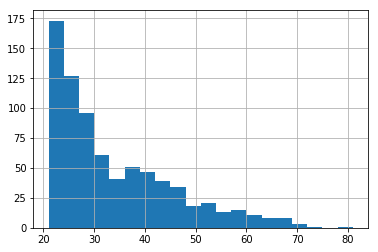

In [15]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [0]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

Train test split

In [0]:
x_data=diabetes.drop('Class',axis=1)

### #labels

In [0]:
labels=diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [56]:
X_train.shape

(537, 9)

In [57]:
y_train.shape

(537,)

In [27]:
X_test.shape


(231, 9)

In [0]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [59]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

W0707 13:11:23.444859 140635183589248 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpz6i04puy


In [60]:
model.train(input_fn=input_func,steps=1000)

W0707 13:11:34.068717 140635183589248 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 720 vs previous value: 720. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


In [0]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [62]:
results=model.evaluate(input_fn=eval_input_func)

W0707 13:11:45.737447 140635183589248 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0707 13:11:45.772691 140635183589248 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [63]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8066255,
 'auc_precision_recall': 0.65435255,
 'average_loss': 0.52323765,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.036162,
 'precision': 0.64788735,
 'prediction/mean': 0.3753456,
 'recall': 0.56790125}

In [0]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [0]:
my_pred=list(model.predict(pred_input_func))

In [78]:
my_pred[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.54105926], dtype=float32),
 'logits': array([0.16460764], dtype=float32),
 'probabilities': array([0.45894077, 0.54105926], dtype=float32)}

# Deep NEURAL NETWORK - Binary classification using Tf estimator API

In [0]:
embedded_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [0]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [0]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [73]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

W0707 13:14:21.667789 140635183589248 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpdppths7l


In [75]:
dnn_model.train(input_fn=input_func,steps=1000)

W0707 13:16:11.357900 140635183589248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1066: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.
W0707 13:16:13.288643 140635183589248 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 84 vs previous value: 84. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0707 13:16:13.468785 140635183589248 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 135 vs previous value: 135. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer

In [0]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [77]:
dnn_model.evaluate(eval_input_func)

W0707 13:17:12.117757 140635183589248 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0707 13:17:12.145980 140635183589248 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8192593,
 'auc_precision_recall': 0.7043557,
 'average_loss': 0.48928955,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.709412,
 'precision': 0.6875,
 'prediction/mean': 0.33804843,
 'recall': 0.54320985}